In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Generate data
x,y=make_blobs(n_samples=100,n_features=3,centers=2,random_state=20)
x=pd.DataFrame(x)
x[2]=1

<AxesSubplot:xlabel='0', ylabel='1'>

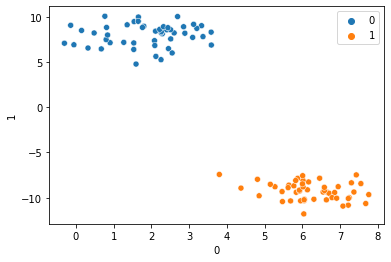

In [3]:
sns.scatterplot(x=x.iloc[:,0],y=x.iloc[:,1],hue=y)


In [4]:
# Cost function
def J(w,x,y):
    m=len(x)
    return (1/m)*np.sum((y-(np.dot(x,w)))**2)

In [5]:
# prediction function
def h(z):
    if z>=0:
        return 1
    else:
        return 0

In [6]:
x.head()

,0,1,2
0,3.584821,8.292401,1
1,2.604239,8.205827,1
2,2.453618,6.468555,1
3,6.136590,-9.129629,1
4,2.111105,8.403393,1


In [7]:
# Batch Gradient descent
def gradient_descent(x,y,alpha):
    x=np.array(x)
    m=len(x)
    n=len(x[0])
    loss_prev=0
    w=np.random.rand(n)
    loss=J(w,x,y)
    loss1=[]
    y_pred=np.zeros((len(y)))
    # Loop until loss is not changing
    while(np.abs(loss-loss_prev)>0.1**6):
        loss_prev=loss
        for j in range(m):
            y_pred[j]=h(np.dot(x[j],w))
            dw=alpha*(y[j]-y_pred[j])*(x[j])
            w=w+dw
            loss=J(w,x,y)
            loss1.append(loss)
        # print(loss-loss_prev)
    return w,y_pred,loss1

In [8]:
w,y_pred,loss1=gradient_descent(x,y,0.0001)
w

array([ 0.1587449 , -0.14993616,  0.428376  ])

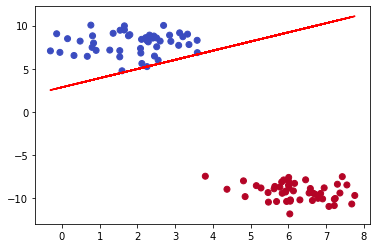

In [9]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y_pred,cmap='coolwarm')
plt.plot(x.iloc[:,0],-(w[0]*x.iloc[:,0]+w[2])/w[1],'r')
plt.show()